# UV pulse duration throughout experiment

The experiment was acquired with Micro-Manager using the [htSMLM plugin](https://github.com/jdeschamps/htSMLM), which includes an automated UV power ramping algorithm for SMLM. The UV power is adjusted by changing the pulse length of the laser trigger generated by MicroFPGA. The values of the pulse duration are extracted from the metadata saved with the images.

The images themselves were analyzed with [SMAP](https://github.com/jries/SMAP), and the number of localizations per frame was exported to a .csv file.

In [1]:
import os
import os.path as op
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# define some matplotlib style for all figures
mpl.rcParams['axes.spines.right'] = True
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'

In [2]:
# extract the UV pulse length
path = op.join('data','smlm','02_sCMOS_Active_30ms_2D_1_MMStack_Pos0_metadata.txt')

with open(path) as f:
    lines = f.readlines()[0:]
    vals = np.zeros((len(lines),1))
    
    for i, l in enumerate(lines):
        s = l.split('\n')[0]
        
        if len(s) > 1:
            vals[i] = float(s)

In [3]:
# extract the number of localizations per frame
path = op.join('data','smlm','02_sCMOS_Active_30ms_2D_1_driftc_sml.csv')
with open(path) as f:
    lines = f.readlines()
    print(lines[0])
    
    nframes = int(lines[-1].split(',')[2])+1
    locs = np.zeros((nframes,1))
    
    for l in lines[1:]:
        frame = int(l.split(',')[2])
        locs[frame] = locs[frame]+1

xnm,ynm,frame,locprecnm,phot,bg,layer



In [4]:
# rolling average of the number of localizations in order to 
# be able to identify a trend (activation is highly stochastic)
win = 100
locs_rav = np.zeros((locs.shape[0]-win,1))
for i in range(len(locs_rav)):
    locs_rav[i] = np.mean(locs[i:i+win])

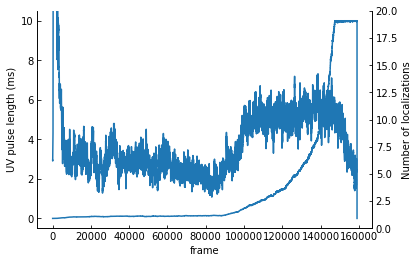

In [5]:
fig,ax = plt.subplots()

ax.plot([i for i in range(len(vals))], vals / 1_000)
ax.set_xlabel('frame')
ax.set_ylabel('UV pulse length (ms)')

ax2=ax.twinx()
ax2.plot([i for i in range(len(locs_rav))], locs_rav)
ax2.set_ylabel('Number of localizations')
ax2.set_ylim([0, 20])

dir_path = 'figs'
if not os.path.isdir(dir_path): os.mkdir(dir_path)
plt.savefig(op.join(dir_path,'fig_us_pulsing.eps'), format='eps')
